In [1]:
import re
import json
import numpy as np
import pandas as pd
from functools import partial

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


## Own specific functions 
from functions import *

In [2]:
df = pd.read_csv(r"datasets\df_optimized.csv")
df_customers_to_predict = pd.read_csv(r"datasets\df_customers_to_predict.csv")

In [3]:
df_analysis(df, "df", analysis_type="header")


Analysis Header of df dataset
--------------------------------------------------------------------------------
- Dataset shape:			 356251 rows and 797 columns
- Total of NaN values:			 48744
- Percentage of NaN:			 0.02 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 2.1 GB


In [4]:
from datetime import date, timedelta

def calculate_years(days):
    """
    Method used to calculate years based on date (today - quantity of days).

    Parameters:
    -----------------
        days (int): Numbers of day to rest of today

    Returns:
    -----------------
        years (int): Numbers of years
    """

    today = date.today()
    initial_date = today - timedelta(abs(days))
    years = today.year - initial_date.year - ((today.month, today.day) < (initial_date.month, initial_date.day))

    return years

In [5]:
df["AGE"] = df["DAYS_BIRTH"].apply(lambda x: calculate_years(x))
df_customers_to_predict["AGE"] = df_customers_to_predict["DAYS_BIRTH"].apply(lambda x: calculate_years(x))

In [6]:
df[["AGE", "DAYS_BIRTH"]].head()

,AGE,DAYS_BIRTH
0,25,-9461
1,45,-16765
2,52,-19046
3,52,-19005
4,54,-19932


In [7]:
df_customers_to_predict[["AGE", "DAYS_BIRTH"]].head()

,AGE,DAYS_BIRTH
0,52,-19241
1,49,-18064
2,54,-20038
3,38,-13976
4,35,-13040


In [8]:
df_customers_to_predict.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT,AGE
0,100001,1,0,0,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683,52
1,100005,0,0,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683,49
2,100013,0,1,0,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,96.000000,54
3,100028,1,0,0,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,49.000000,38
4,100038,0,1,1,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683,35


In [9]:
XXX

NameError: name 'XXX' is not defined

In [10]:
df_select = df_customers_to_predict[df_customers_to_predict["SK_ID_CURR"]==100013]
df_select["AGE"]

2    54
Name: AGE, dtype: int64

[Text(0.5, 1.0, 'Customer age'), Text(0.5, 0, 'Age(Year)'), Text(0, 0.5, '')]

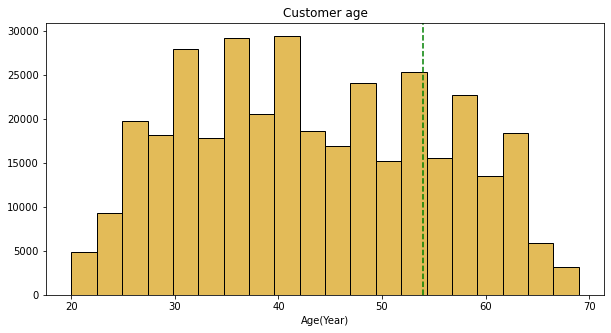

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df["AGE"], edgecolor='k', color="goldenrod", bins=20)
ax.axvline(df_select["AGE"].values, color="green", linestyle='--')
ax.set(title='Customer age', xlabel='Age(Year)', ylabel='')


In [40]:
df_temp = df.groupby("AGE").size()
df_temp = pd.DataFrame(df_temp).reset_index()
df_temp.columns = ["AGE", "QUANTITY"]
df_temp.head()

,AGE,QUANTITY
0,20,4
1,21,1302
2,22,3551
3,23,4705
4,24,4542


In [49]:
sam_dict = df_temp.set_index('AGE').to_dict()['QUANTITY']
sam_dict

{20: 4,
 21: 1302,
 22: 3551,
 23: 4705,
 24: 4542,
 25: 4763,
 26: 5218,
 27: 9801,
 28: 9277,
 29: 8901,
 30: 8968,
 31: 9727,
 32: 9206,
 33: 8953,
 34: 8910,
 35: 9052,
 36: 9916,
 37: 10232,
 38: 10312,
 39: 10167,
 40: 9993,
 41: 9835,
 42: 9571,
 43: 9597,
 44: 9059,
 45: 8500,
 46: 8439,
 47: 8158,
 48: 8107,
 49: 7827,
 50: 7442,
 51: 7790,
 52: 7931,
 53: 8569,
 54: 8750,
 55: 7543,
 56: 7980,
 57: 7768,
 58: 7200,
 59: 7696,
 60: 7143,
 61: 6335,
 62: 6371,
 63: 6042,
 64: 5980,
 65: 3429,
 66: 2497,
 67: 2415,
 68: 776,
 69: 1}

<AxesSubplot:ylabel='Count'>

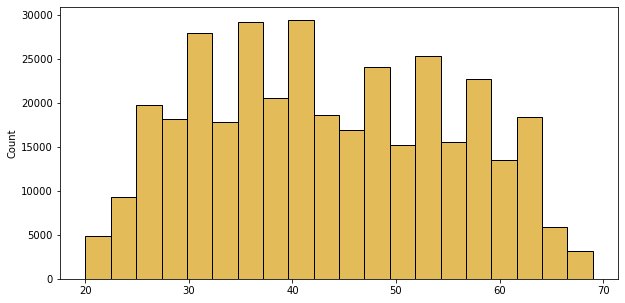

In [52]:
sam_lict = [key for key, val in sam_dict.items() for _ in range(val)]
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(sam_lict, edgecolor='k', color="goldenrod", bins=20)


[Text(0.5, 1.0, 'Customer age'), Text(0.5, 0, 'Age(Year)'), Text(0, 0.5, '')]

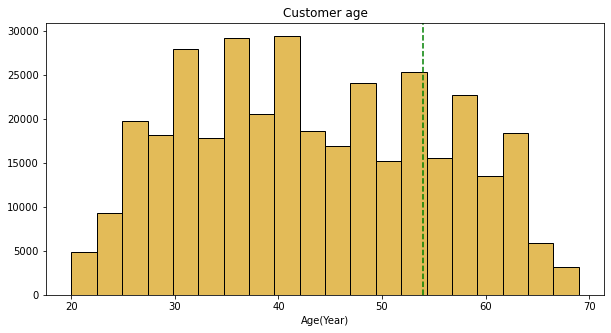

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df["AGE"], edgecolor='k', color="goldenrod", bins=20)
ax.axvline(df_select["AGE"].values, color="green", linestyle='--')
ax.set(title='Customer age', xlabel='Age(Year)', ylabel='')


[Text(0.5, 1.0, 'Customer age'),
 Text(0.5, 3.200000000000003, 'Age(Year)'),
 Text(17.200000000000003, 0.5, '')]

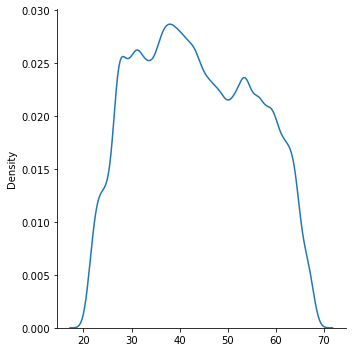

In [55]:
sns.displot(sam_lict, kind="kde")
ax.axvline(df_select["AGE"].values, color="green", linestyle='--')
ax.set(title='Customer age', xlabel='Age(Year)', ylabel='')

In [ ]:
mydict = {1: 27, 34: 1, 3: 72, 4: 62, 5: 33, 6: 36, 7: 20, 8: 12, 9: 9, 10: 6, 11: 5, 12: 8, 2: 74, 14: 4, 15: 3, 16: 1, 17: 1, 18: 1, 19: 1, 21: 1, 27: 2}

mylist = [key for key, val in mydict.items() for _ in range(val)]
plt.hist(mylist, bins=20)

In [ ]:
print(df.groupby('Team').size())

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df["DAYS_BIRTH_NEW"], edgecolor="k", color="goldenrod", bins=20)

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm", kde=True)

In [ ]:
sns.displot(df["DAYS_BIRTH_NEW"])

In [ ]:
sns.lineplot(df["DAYS_BIRTH_NEW"])

In [ ]:
#Age distribution plot
        data_age = load_age_population(data)
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.histplot(data_age, edgecolor = 'k', color="goldenrod", bins=20)
        ax.axvline(int(infos_client["DAYS_BIRTH"].values / 365), color="green", linestyle='--')
        ax.set(title='Customer age', xlabel='Age(Year)', ylabel='')
        st.pyplot(fig)

In [ ]:
    @st.cache
    def load_age_population(data):
        data_age = round((data["DAYS_BIRTH"]/365), 2)
        return data_age

In [ ]:
sns.histplot(round(df["DAYS_BIRTH"]/365, 2), edgecolor="k", color="goldenrod", bins=20)

In [ ]:
df["DAYS_BIRTH"].max()

In [ ]:
print(-7338/365)

In [ ]:
years = calculate_years(-7338)
print(years)

In [ ]:
df.head()

In [ ]:
df["AMT_INCOME_TOTAL"].head()

In [ ]:
df["AMT_INCOME_TOTAL"].max()

In [ ]:
df["AMT_INCOME_TOTAL"].min()

In [ ]:
np.linspace(2.0, 3.0, num=5, retstep=True)

In [ ]:
bins = np.linspace(min(df["AMT_INCOME_TOTAL"]), max(df["AMT_INCOME_TOTAL"]), 50)

In [ ]:
bins

In [ ]:
bins = np.linspace(start = 0, stop = 100, num = 11)

In [ ]:
bins

In [ ]:
for key, value in detectors.items():
    
    axvline_value = globals()["df_" + key + "_img_features_pca"].shape[1]
    
    globals()["scree_" + key] = globals()["pca_" + key].explained_variance_ratio_*100
    
    fig = plt.subplots(figsize=(8, 5))
    plt.plot(np.arange(len(globals()["scree_" + key]))+1,
             globals()["scree_" + key].cumsum())
    
    plt.xlabel("Number of principal components", size=12)
    plt.ylabel("% of inertia", size=12)
    
    plt.axhline(80, lw=1, c="red")
    plt.text(1, 81, "80%", c="red")
    
    plt.axvline(axvline_value, lw=1, c="red")
    plt.text(axvline_value - 6, 8, axvline_value, c="red")
    
    plt.title("Scree of eigenvalues - " + key.upper(), size=18, fontweight="bold")
    plt.tight_layout()
    plt.show()
    
    print("\n")